<a href="https://colab.research.google.com/github/saeidakbari3364/Deep-Learning/blob/main/CNN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

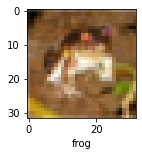

In [11]:
plot_sample(X_train, y_train, 0)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8097 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6216 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5384 - accuracy: 0.4541
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4782 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4295 - accuracy: 0.4984


In [14]:
#You can see that at the end of 5 epochs, accuracy is at around 49%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.26      0.37      1000
           1       0.40      0.69      0.51      1000
           2       0.48      0.14      0.22      1000
           3       0.45      0.14      0.22      1000
           4       0.43      0.43      0.43      1000
           5       0.40      0.38      0.39      1000
           6       0.55      0.49      0.52      1000
           7       0.74      0.33      0.46      1000
           8       0.29      0.87      0.44      1000
           9       0.45      0.44      0.44      1000

    accuracy                           0.42     10000
   macro avg       0.48      0.42      0.40     10000
weighted avg       0.48      0.42      0.40     10000



In [16]:
#Now let us build a convolutional neural network to train our images

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.5206 - accuracy: 0.4526
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1400 - accuracy: 0.6009
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0066 - accuracy: 0.6492
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9245 - accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8606 - accuracy: 0.7018
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8104 - accuracy: 0.7189
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7674 - accuracy: 0.7322
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7298 - accuracy: 0.7462
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6951 - accuracy: 0.7561
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.66

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [20]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.9335 - accuracy: 0.6894


[0.9334759712219238, 0.6894000172615051]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.4802274e-04, 2.6388775e-04, 3.6284914e-03, 7.1322107e-01,
        1.6002128e-02, 2.3530714e-01, 6.5185688e-03, 1.5728655e-03,
        2.3325769e-02, 1.2092094e-05],
       [1.5924082e-03, 1.5080388e-01, 1.8811638e-03, 2.3185416e-06,
        4.4317585e-07, 5.1062305e-08, 1.3867867e-07, 1.5098165e-06,
        8.4112686e-01, 4.5911726e-03],
       [1.7278072e-01, 4.8041511e-01, 4.7836578e-03, 5.5458094e-03,
        6.1031111e-04, 3.0129247e-03, 3.3123264e-04, 1.7519776e-02,
        2.3222104e-01, 8.2779445e-02],
       [7.8230363e-01, 6.0327966e-02, 3.3140413e-02, 2.2405230e-03,
        2.1681195e-02, 8.4776482e-05, 5.4457330e-04, 4.2327768e-03,
        9.5049210e-02, 3.9498488e-04],
       [1.8941370e-07, 1.1785678e-05, 8.9776963e-03, 1.7815510e-02,
        3.0086432e-02, 2.3885150e-04, 9.4286293e-01, 4.5055245e-07,
        6.0682751e-06, 8.2845695e-08]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

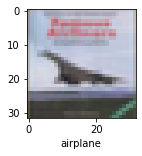

In [24]:
plot_sample(X_test, y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'